In [ ]:
#https://www.gru.com.br/pt/institucional/informacoes-operacionais


In [1]:
%config IPCompleter.greedy=True
import pandas as pd

# flattening list    
flatten = lambda l: [item for sublist in l for item in sublist]

# importando dataset
df = pd.read_csv("dados.csv")
df

,MÊS,2014,2015,2016,2017,2018,2019
0,01 - JAN,3589387,3804729,3674326,3447322,3763902,4004634.0
1,02 - FEV,2954750,2994581,2972749,2790148,3070211,NaN
2,03 - MAR,3172143,3100006,2948159,3037730,3378986,NaN
3,04 - ABR,3170158,3075647,2846967,2845364,3320989,NaN
4,05 - MAI,3128800,3094241,2870786,2921197,3389600,NaN
5,06 - JUN,3043624,3016587,2837694,2903515,3270866,NaN
6,07 - JUL,3522828,3617078,3358541,3498686,3982423,NaN
7,08 - AGO,3364311,3303752,3034686,3220790,3571140,NaN
8,09 - SET,3258976,3161001,2923838,3153049,3452948,NaN
9,10 - OUT,3472270,3274197,3039886,3278261,3571611,NaN


In [2]:

# Formatação e limpeza dos dados

# Criando matriz tansposta
df_transposed = df.transpose()

# Criando nova coluna apenas com os dígitos do mês [01 - 12]
df_transposed.loc['MES_DIGIT'] = [ x[0:2] for x in df_transposed.loc['MÊS']]

# Para cada coluna é gerada uma lista de 12 meses no formato yyyy-mm
dates = [year +"-"+ df_transposed.loc['MES_DIGIT'] for year in df.columns[1:].values]

# Todas as listas são mescladas criando uma lista única de datas
dates = flatten(dates)

# Cria uma lista única com todos os passajeiros
passengers = df_transposed.drop(['MÊS','MES_DIGIT']).values.flatten()

# Criando dataframe na estrutura esperada pelo prophet (DS, Y)
ts_df = pd.DataFrame({'ds': dates, 'y': passengers})

# Cria índice
ts_df['ds'] = pd.DatetimeIndex(ts_df['ds'])

# Exibe 5 primeiros registros do dataset
ts_df.head()

,ds,y
0,2014-01-01,3589387
1,2014-02-01,2954750
2,2014-03-01,3172143
3,2014-04-01,3170158
4,2014-05-01,3128800


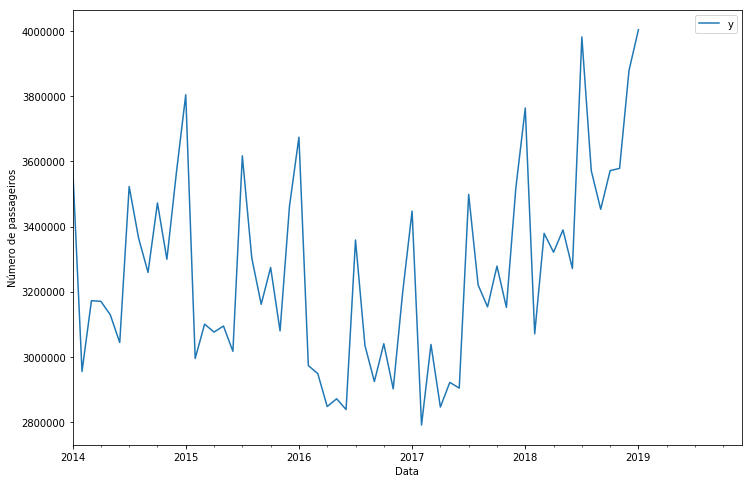

In [3]:

%matplotlib inline

import matplotlib.pyplot as plt

ax = ts_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Número de passageiros')
ax.set_xlabel('Data')

plt.show()

In [4]:
from fbprophet import Prophet
model = Prophet(interval_width=0.95, weekly_seasonality=True, daily_seasonality=True)
model.fit(ts_df)

C:\Users\Elizeu\Anaconda3\envs\forecasting\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\Elizeu\Anaconda3\envs\forecasting\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [5]:
# Gerando datas futuras para predição
future = model.make_future_dataframe(periods=13, freq = 'm')
future.tail(15)

,ds
70,2019-11-01
71,2019-12-01
72,2019-12-31
73,2020-01-31
74,2020-02-29
75,2020-03-31
76,2020-04-30
77,2020-05-31
78,2020-06-30
79,2020-07-31


In [6]:
# Aplicando algoritmo de predição
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
70,2019-11-01,3.850287e+06,3.712193e+06,3.993238e+06
71,2019-12-01,4.273769e+06,4.130685e+06,4.425897e+06
72,2019-12-31,4.495558e+06,4.340897e+06,4.646016e+06
73,2020-01-31,3.791133e+06,3.631484e+06,3.960622e+06
74,2020-02-29,3.856675e+06,3.691006e+06,4.036781e+06
75,2020-03-31,3.947597e+06,3.769103e+06,4.153238e+06
76,2020-04-30,4.020930e+06,3.817204e+06,4.210812e+06
77,2020-05-31,3.874848e+06,3.666021e+06,4.101552e+06
78,2020-06-30,4.519263e+06,4.293033e+06,4.751656e+06
79,2020-07-31,4.283374e+06,4.038761e+06,4.527407e+06


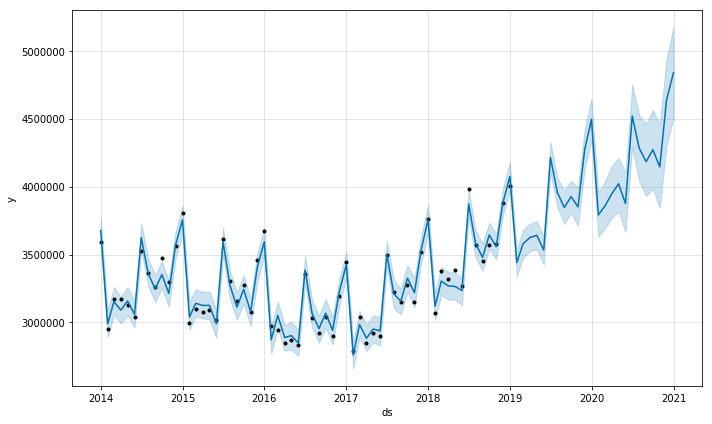

In [7]:

# Exibindo valores para novas datas 

model.plot(forecast,uncertainty=True)
plt.show()

In [ ]:
# Exibindo tendência e comportanto anual
model.plot_components(forecast)
plt.show()